In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns#https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019

In [3]:
df = pd.read_csv("datasets/Amazon_top_selling_book.csv")

In [4]:
df.shape

(550, 7)

In [5]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [6]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
# Note that min Price is 0. This could be a missing value. Lets check them
# I'm going to impute the misssing price values by average Price

print(df[df['Price']==0])

df.loc[df['Price']==0, 'Price'] = df['Price'].mean()
df.describe()

                                                  Name  \
42          Cabin Fever (Diary of a Wimpy Kid, Book 6)   
71             Diary of a Wimpy Kid: Hard Luck, Book 8   
116                        Frozen (Little Golden Book)   
193                               JOURNEY TO THE ICE P   
219                                  Little Blue Truck   
358              The Constitution of the United States   
381                                        The Getaway   
461  The Short Second Life of Bree Tanner: An Eclip...   
505                              To Kill a Mockingbird   
506                              To Kill a Mockingbird   
507                              To Kill a Mockingbird   
508                              To Kill a Mockingbird   

                               Author  User Rating  Reviews  Price  Year  \
42                        Jeff Kinney          4.8     4505      0  2011   
71                        Jeff Kinney          4.8     6812      0  2013   
116              

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.385818,2014.000000
std,0.226980,11731.132017,10.664041,3.165156
min,3.300000,37.000000,1.000000,2009.000000
25%,4.500000,4058.000000,8.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    float64
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 30.2+ KB


In [10]:
df.isnull().sum(axis=0) #No missing values

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [11]:
# Name, Author and Genre are of type object. 
# I don't think Name and Author should be changed to categorical
# But just for sanity check let's verify the unique values

df[['Name', 'Author', 'Genre']].nunique()

Name      351
Author    248
Genre       2
dtype: int64

In [12]:
# Since Genre has only two unique values we can convert it to 0, 1
df['Genre'].unique()

# Non Fiction = 0
df['Genre'] = (df['Genre'] == 'Non Fiction').astype(int)

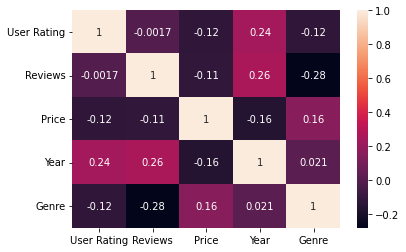

In [13]:
# Checking correlations between the variables

sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
# Doesn't seem like there is a strong correlation between any variables

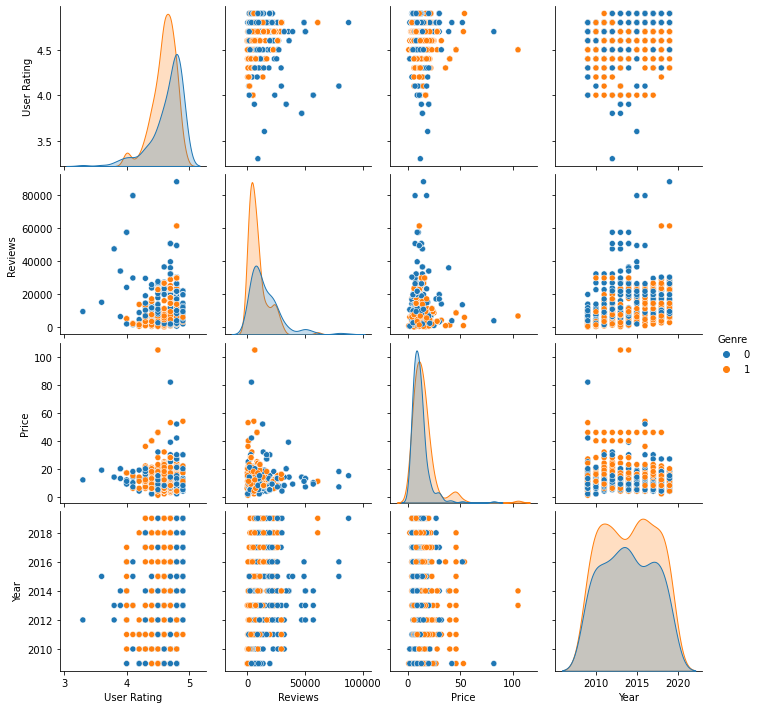

In [15]:
# Lets check a pairplot with genre as hue to see if it affects the other variables

sns.pairplot(df, hue="Genre");
plt.show()

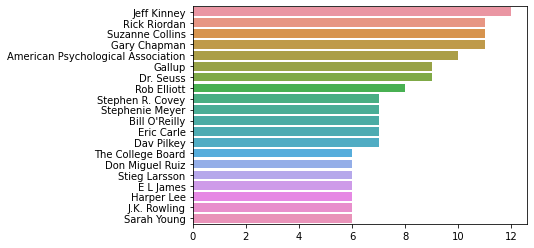

In [16]:
# Data is pretty mixed between the two genres for all variables. There isn't any obvious distinctions

# Lets check the top selling authors
top20authors = df['Author'].value_counts(sort=True, ascending=False)[:20,]
sns.barplot(x=top20authors.values, y=top20authors.index)
plt.show()

In [17]:
# Best Selling author Jeff Kinney with 12 books. 3 people with 11 books

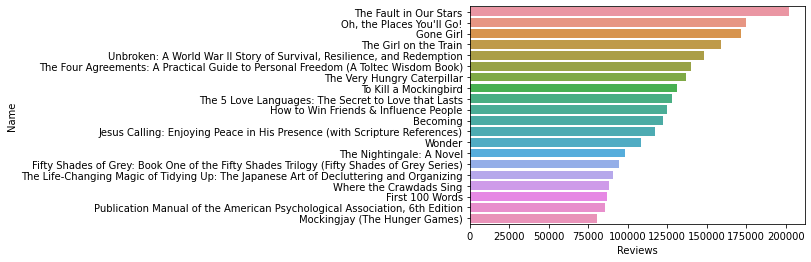

In [18]:
# Most reviewed books

top20books = df.groupby(['Name']).agg({'Reviews':sum}).sort_values('Reviews', ascending=False).iloc[:20,]
sns.barplot(x=top20books['Reviews'], y=top20books.index)
plt.show()

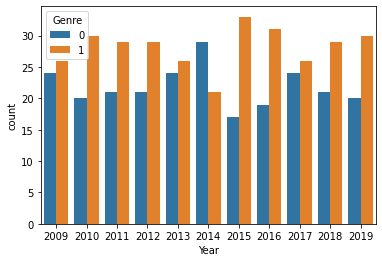

In [19]:
# Finally lets create a countplot of fiction and non-fiction books over the year

sns.countplot(x='Year', hue='Genre', data=df)
plt.show()

In [20]:
# In 2014 there were more non-fiction books in the top-selling list than fiction books
# This has never happened again